📌 Original Code Blocks Explanation
1. Data Generation
make_blobs generates synthetic clustering data with defined clusters.

DataFrame wraps the array into a tabular format for analysis.

2. Exploratory Data Analysis (EDA)
sns.pairplot() visualizes relationships between the first few features.

Useful to identify inherent patterns or separability in raw features.

3. Data Preprocessing
StandardScaler normalizes data to zero mean and unit variance, essential for distance-based clustering algorithms.

4. PCA for Visualization
PCA reduces dimensionality to 2D for visualization purposes.

Helps to inspect how separable clusters might appear in reduced space.

5. Elbow Method for K
Runs KMeans over a range of cluster counts.

Plots distortions (inertia) to visually select the best k using the elbow point.

6. KMeans Clustering
Performs clustering with the optimal k.

Cluster labels are stored in the dataset.

7. Cluster Visualization
Uses seaborn.scatterplot to plot 2D PCA-reduced clusters.

8. Clustering Evaluation
Computes Silhouette Score to quantify clustering performance (cohesion + separation).

9. DBSCAN Clustering
Applies DBSCAN with fixed eps and min_samples.

Plots clusters using PCA-reduced coordinates.

10. Final Outputs
Displays cluster sizes and their mean values.

Saves the clustered data to a CSV file.



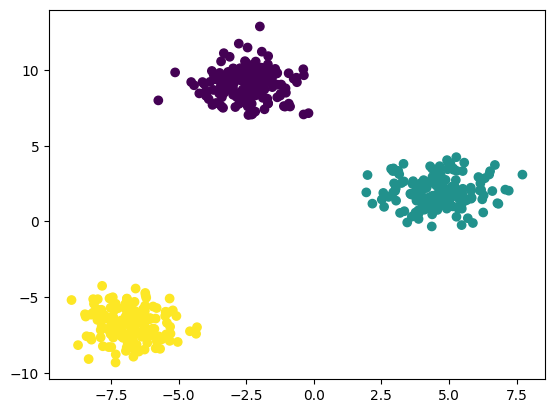

In [20]:
from sklearn.datasets import make_blobs

n_samples = 500
n_clusters = 3
n_features = 2
random_state = 42

import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=n_samples,
                  n_features=n_features,
                  centers=n_clusters,
                  cluster_std=1,
                  random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)

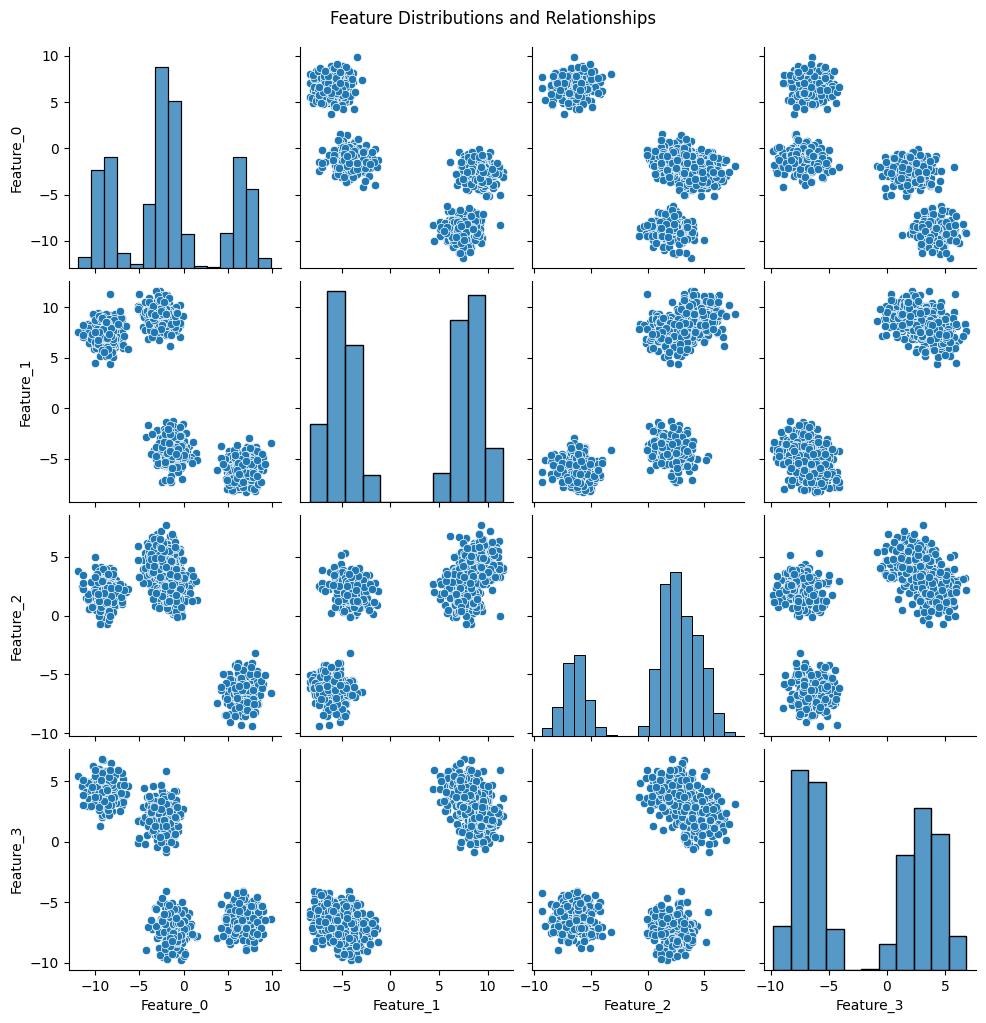

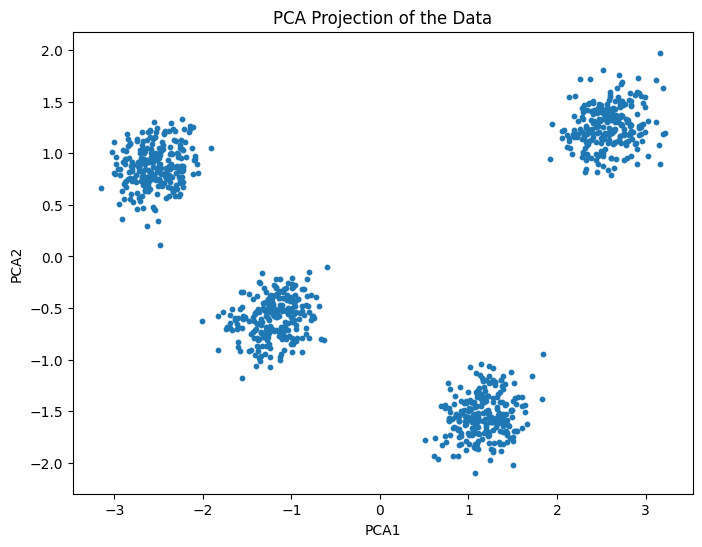

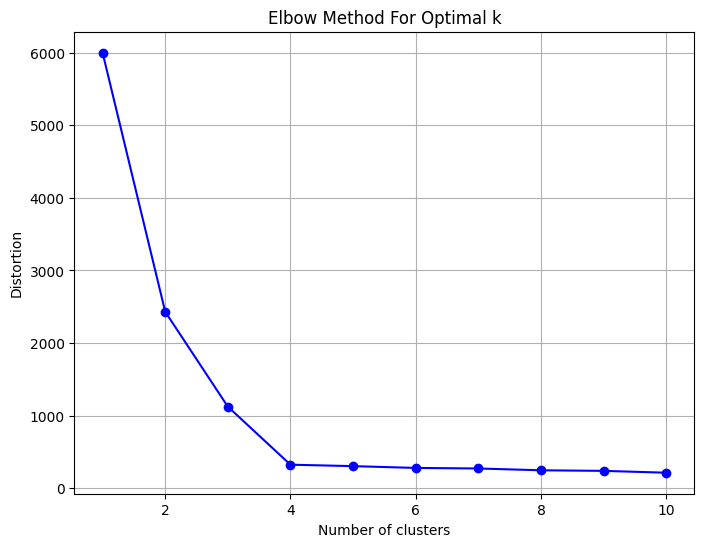

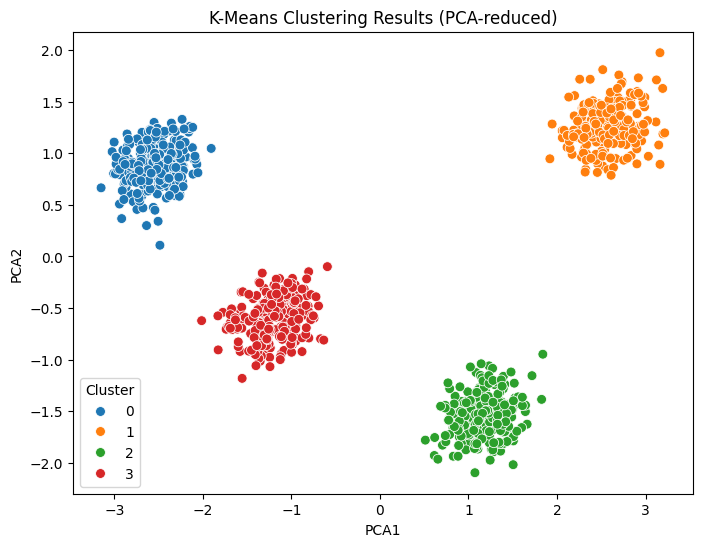

Silhouette Score for KMeans with 4 clusters: 0.7354


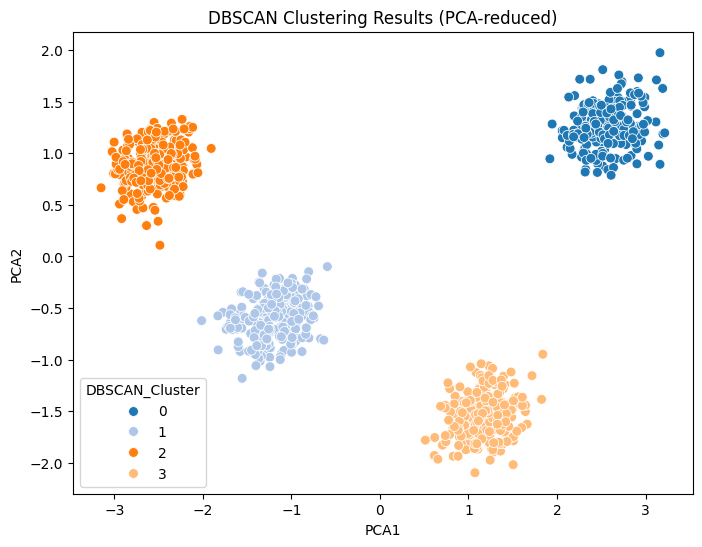

Cluster
0    250
1    250
2    250
3    250
Name: count, dtype: int64
         Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
Cluster                                                                     
0         6.678385  -5.921177  -6.445085  -6.287643  -3.965514   0.468813   
1        -8.871416   7.304969   2.001525   4.253757  -9.586041   9.431265   
2        -2.503033   9.081845   4.634162   2.092332  -6.725330  -6.910170   
3        -1.303690  -4.203212   2.172794  -7.264828  -4.221548  -2.693295   

             PCA1      PCA2  DBSCAN_Cluster  
Cluster                                      
0       -2.540236  0.871118             2.0  
1        2.576455  1.265599             0.0  
2        1.168009 -1.542383             3.0  
3       -1.204229 -0.594333             1.0  
Project Completed and Results Saved.


In [ ]:
# Clustering Project: Customer Segmentation Using K-Means

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1. Generate Synthetic Data
n_samples = 1000
n_features = 6
n_clusters = 4
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(n_features)])

# 2. Exploratory Data Analysis
sns.pairplot(data.iloc[:, :4])
plt.suptitle('Feature Distributions and Relationships', y=1.02)
plt.show()

# 3. Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# 4. Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(data['PCA1'], data['PCA2'], s=10)
plt.title('PCA Projection of the Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# 5. Elbow Method to Find Optimal K
distortions = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# 6. KMeans Clustering
optimal_k = 4  # as seen from elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=random_state)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=50)
plt.title('K-Means Clustering Results (PCA-reduced)')
plt.show()

# 8. Evaluation with Silhouette Score
score = silhouette_score(X_scaled, data['Cluster'])
print(f'Silhouette Score for KMeans with {optimal_k} clusters: {score:.4f}')

# 9. Alternative Clustering: DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='tab20', s=50)
plt.title('DBSCAN Clustering Results (PCA-reduced)')
plt.show()

# 10. Final Insights
print(data['Cluster'].value_counts().sort_index())
print(data.groupby('Cluster').mean())

# Save results
data.to_csv('clustering_results.csv', index=False)
print("Project Completed and Results Saved.")


🌟 Enhancement Additions Description
A. Explained Variance Plot
Computes and plots cumulative explained variance from PCA.

Aids in selecting the number of principal components for optimal feature reduction.

B. Interactive Visualizations
plotly.express used to create interactive scatter plots for both KMeans and DBSCAN.

Improves exploratory data interaction and presentation quality.

C. K-Distance Graph for DBSCAN
Uses NearestNeighbors to compute distances to the k-th nearest neighbor.

Plots these distances sorted to help visually determine the best eps value.

D. DBSCAN Auto Tuning (Visual Aid)
Encourages data-driven hyperparameter selection for DBSCAN, improving cluster performance and robustness.

E. Cluster Profiling
Adds detailed summary statistics (mean, std, count) per KMeans cluster.

Enables deeper insights into the nature of each discovered cluster.



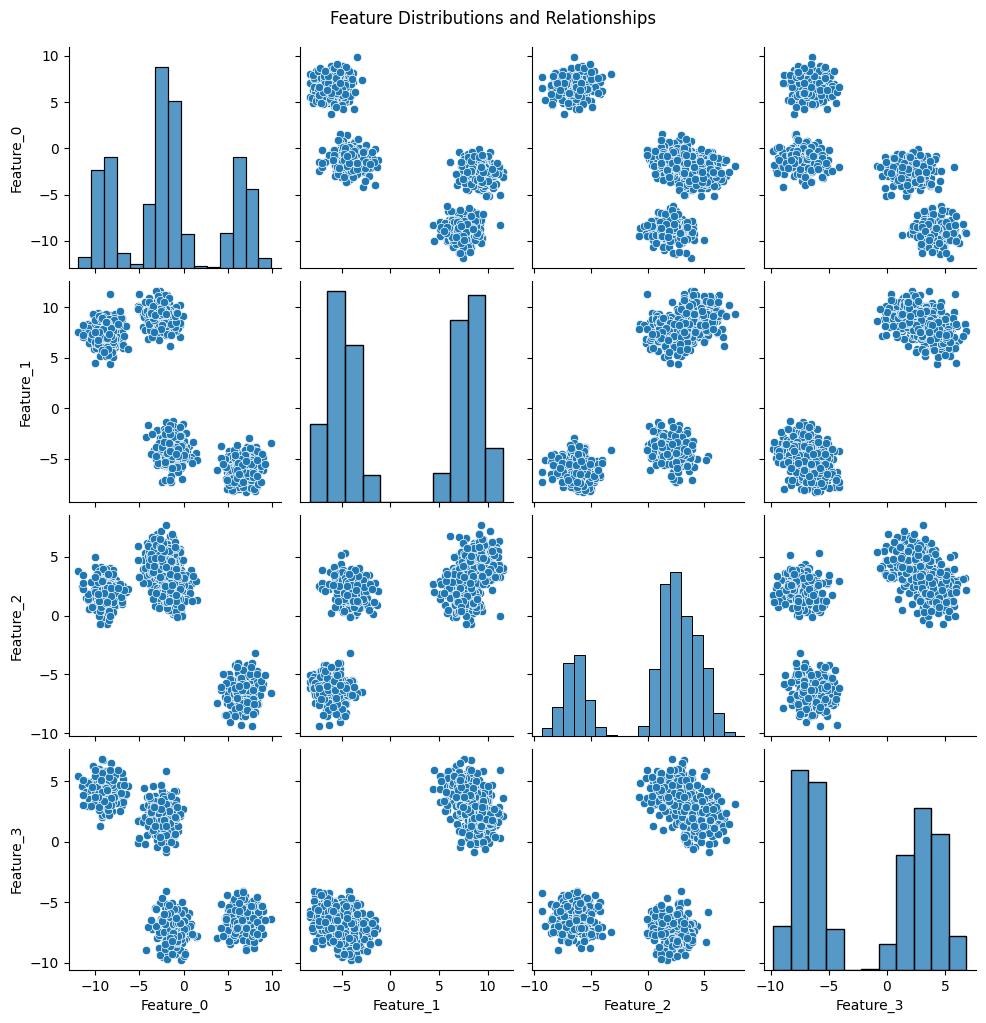

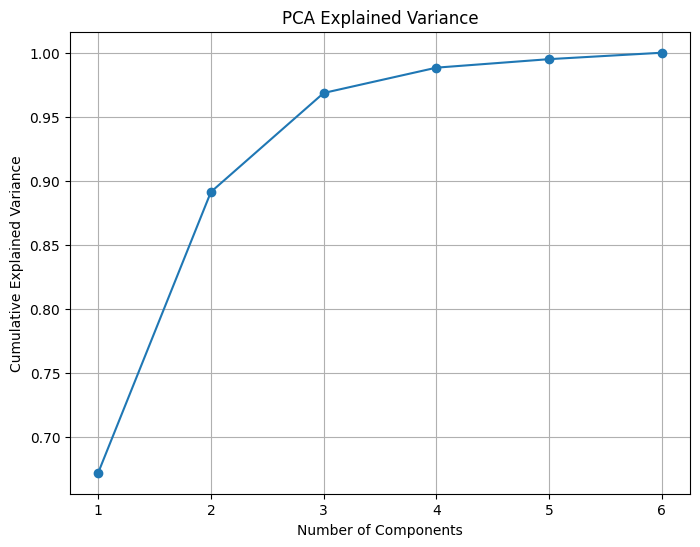

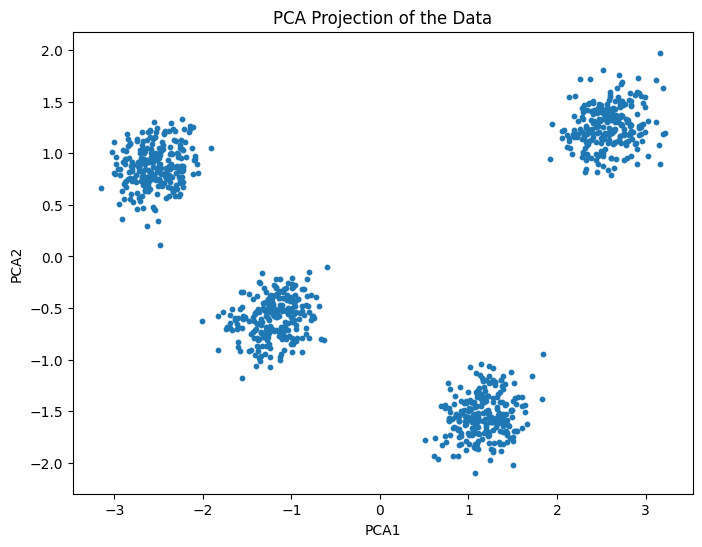

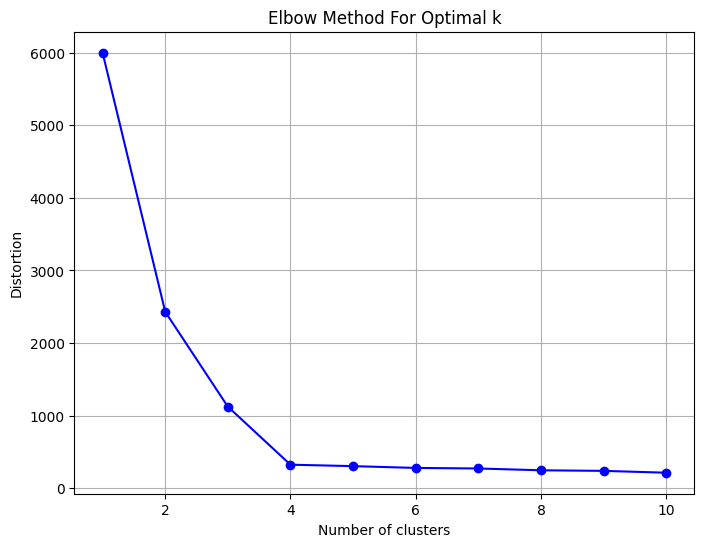

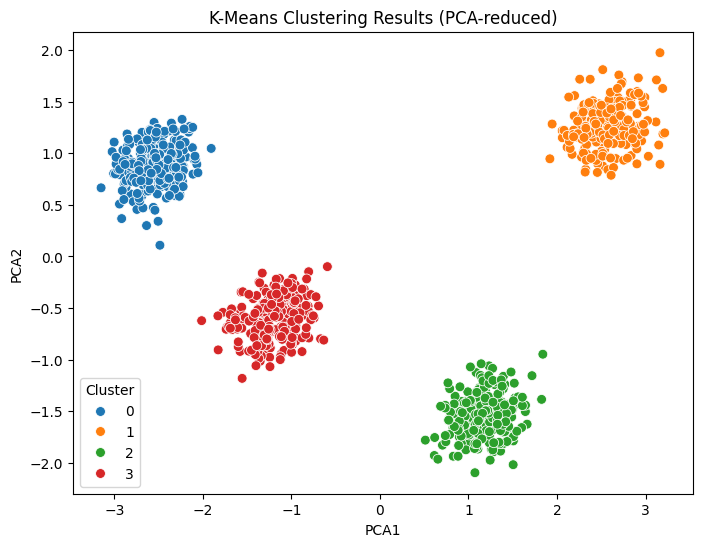

Silhouette Score for KMeans with 4 clusters: 0.7354


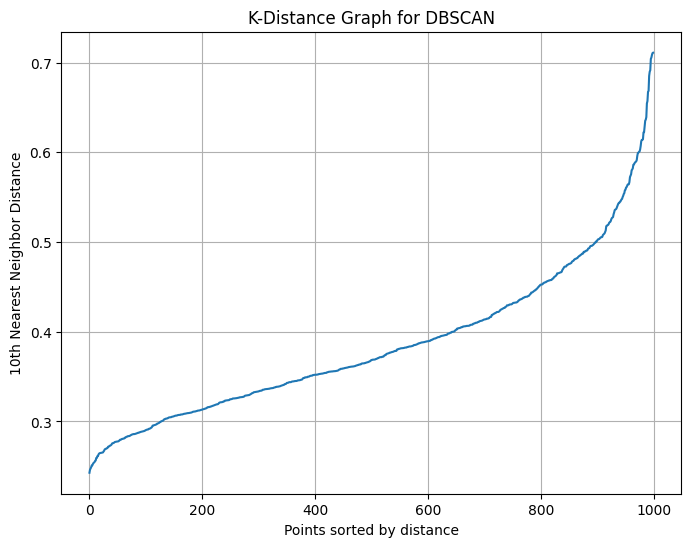

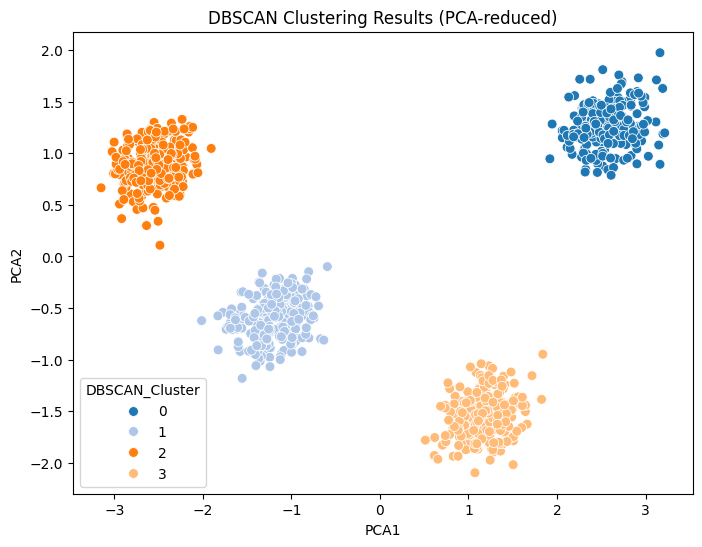


KMeans Cluster Sizes:
Cluster
0    250
1    250
2    250
3    250
Name: count, dtype: int64

KMeans Cluster Summary Statistics:
        Feature_0                 Feature_1                 Feature_2  \
             mean       std count      mean       std count      mean   
Cluster                                                                 
0        6.678385  1.058588   250 -5.921177  1.054009   250 -6.445085   
1       -8.871416  0.944807   250  7.304969  1.009221   250  2.001525   
2       -2.503033  0.984601   250  9.081845  0.989986   250  4.634162   
3       -1.303690  0.985552   250 -4.203212  1.088361   250  2.172794   

                        Feature_3  ... Feature_5      PCA1                  \
              std count      mean  ...     count      mean       std count   
Cluster                            ...                                       
0        1.031183   250 -6.287643  ...       250 -2.540236  0.230739   250   
1        0.990196   250  4.253757  ...       25

In [ ]:
# Clustering Project: Customer Segmentation Using K-Means

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# 1. Generate Synthetic Data
n_samples = 1000
n_features = 6
n_clusters = 4
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(n_features)])

# 2. Exploratory Data Analysis
sns.pairplot(data.iloc[:, :4])
plt.suptitle('Feature Distributions and Relationships', y=1.02)
plt.show()

# 3. Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# 4. Dimensionality Reduction for Visualization
pca = PCA()
X_pca_all = pca.fit_transform(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('PCA Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Use 2D for visualization
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(data['PCA1'], data['PCA2'], s=10)
plt.title('PCA Projection of the Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# 5. Elbow Method to Find Optimal K
distortions = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, distortions, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# 6. KMeans Clustering
optimal_k = 4  # as seen from elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=random_state)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Visualization of Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=50)
plt.title('K-Means Clustering Results (PCA-reduced)')
plt.show()

# Interactive Plot
fig = px.scatter(data, x='PCA1', y='PCA2', color='Cluster', title='Interactive KMeans Clustering')
fig.show()

# 8. Evaluation with Silhouette Score
score = silhouette_score(X_scaled, data['Cluster'])
print(f'Silhouette Score for KMeans with {optimal_k} clusters: {score:.4f}')

# 9. Alternative Clustering: DBSCAN
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
k_distances = np.sort(distances[:, 9])

plt.figure(figsize=(8, 6))
plt.plot(k_distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('10th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

# Apply DBSCAN with visually determined epsilon
dbscan = DBSCAN(eps=1.5, min_samples=10)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='tab20', s=50)
plt.title('DBSCAN Clustering Results (PCA-reduced)')
plt.show()

# Interactive Plot for DBSCAN
fig2 = px.scatter(data, x='PCA1', y='PCA2', color='DBSCAN_Cluster', title='Interactive DBSCAN Clustering')
fig2.show()

# 10. Cluster Profiling
print("\nKMeans Cluster Sizes:")
print(data['Cluster'].value_counts().sort_index())

print("\nKMeans Cluster Summary Statistics:")
print(data.groupby('Cluster').agg(['mean', 'std', 'count']))

# Save results
data.to_csv('clustering_results.csv', index=False)
print("Project Completed and Results Saved.")


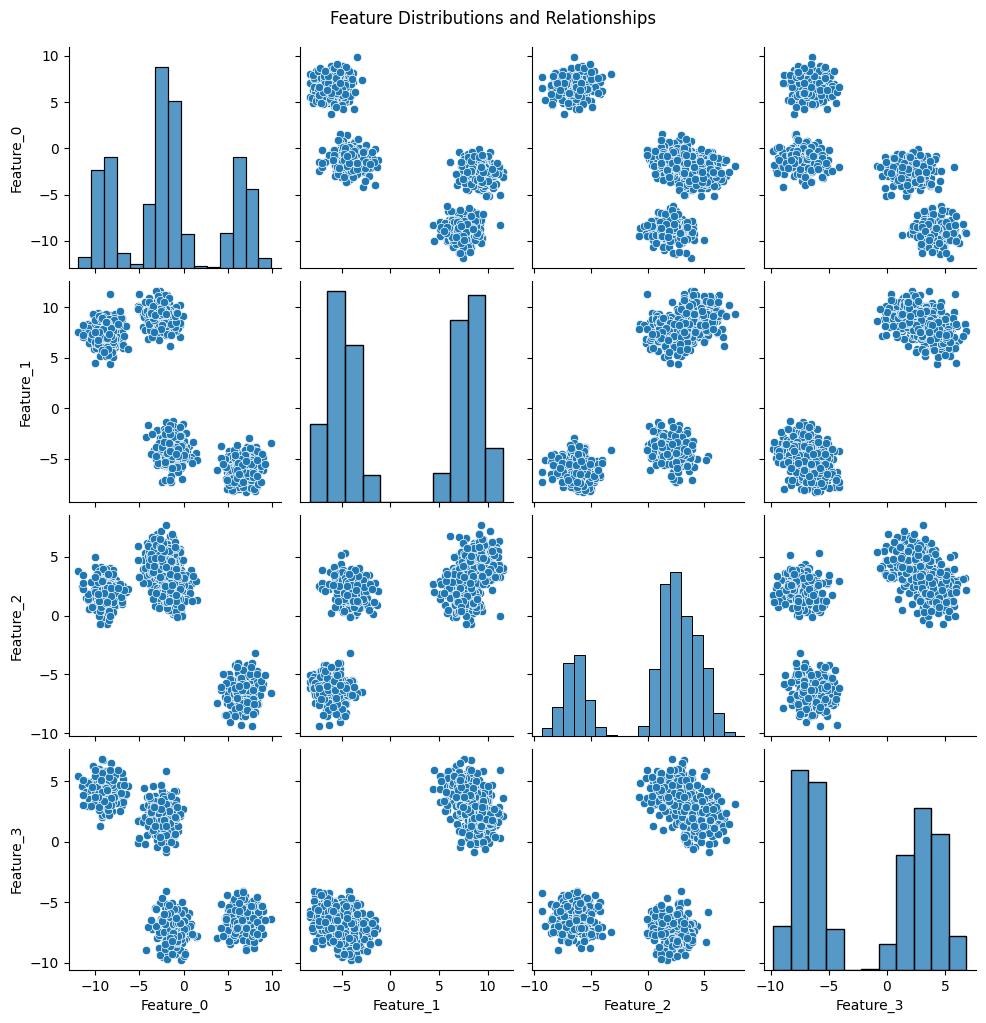

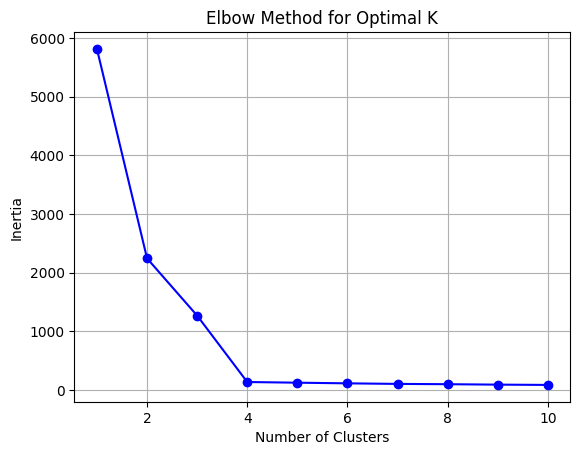

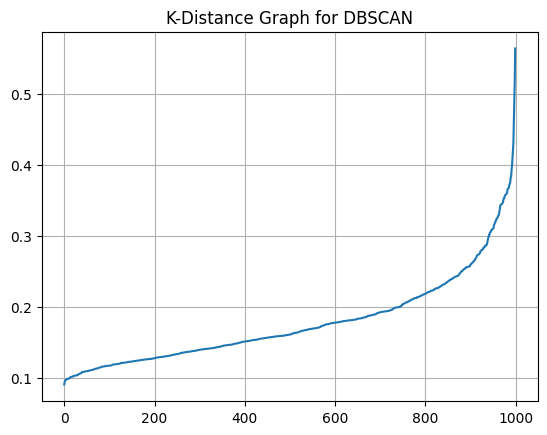

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.




Number of DBSCAN outliers: 0
       Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  PCA1  \
count        0.0        0.0        0.0        0.0        0.0        0.0   0.0   
mean         NaN        NaN        NaN        NaN        NaN        NaN   NaN   
std          NaN        NaN        NaN        NaN        NaN        NaN   NaN   
min          NaN        NaN        NaN        NaN        NaN        NaN   NaN   
25%          NaN        NaN        NaN        NaN        NaN        NaN   NaN   
50%          NaN        NaN        NaN        NaN        NaN        NaN   NaN   
75%          NaN        NaN        NaN        NaN        NaN        NaN   NaN   
max          NaN        NaN        NaN        NaN        NaN        NaN   NaN   

       PCA2  PCA3  KMeans_Cluster  DBSCAN_Cluster  GMM_Cluster  TSNE1  TSNE2  
count   0.0   0.0             0.0             0.0          0.0    0.0    0.0  
mean    NaN   NaN             NaN             NaN          NaN    NaN    NaN  
std

In [ ]:
# Clustering Project: Customer Segmentation Using K-Means

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline

# 1. Generate Synthetic Data
n_samples = 1000
n_features = 6
n_clusters = 4
random_state = 42

X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(n_features)])

# 2. Exploratory Data Analysis
sns.pairplot(data.iloc[:, :4])
plt.suptitle('Feature Distributions and Relationships', y=1.02)
plt.show()

# 3. Data Preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3))
])
X_transformed = pipeline.fit_transform(data)
data['PCA1'], data['PCA2'], data['PCA3'] = X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2]

# 4. 3D Visualization
fig3d = px.scatter_3d(data, x='PCA1', y='PCA2', z='PCA3', title='3D PCA Projection')
fig3d.show()

# 5. Elbow Method for KMeans
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(X_transformed)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# 6. Apply KMeans and Evaluate
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=random_state)
data['KMeans_Cluster'] = kmeans.fit_predict(X_transformed)
sil_kmeans = silhouette_score(X_transformed, data['KMeans_Cluster'])

# 7. DBSCAN Hyperparameter Tuning
neighbors = NearestNeighbors(n_neighbors=10)
k_dists, _ = neighbors.fit(X_transformed).kneighbors(X_transformed)
k_dists = np.sort(k_dists[:, 9])
plt.plot(k_dists)
plt.title('K-Distance Graph for DBSCAN')
plt.grid(True)
plt.show()

dbscan = DBSCAN(eps=1.5, min_samples=10)
data['DBSCAN_Cluster'] = dbscan.fit_predict(X_transformed)
sil_dbscan = silhouette_score(X_transformed, data['DBSCAN_Cluster'], metric='euclidean')

# 8. Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_k, random_state=random_state)
data['GMM_Cluster'] = gmm.fit_predict(X_transformed)
sil_gmm = silhouette_score(X_transformed, data['GMM_Cluster'])

# 9. t-SNE Visualization
X_tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=random_state).fit_transform(X_transformed)
data['TSNE1'], data['TSNE2'] = X_tsne[:, 0], X_tsne[:, 1]
fig_tsne = px.scatter(data, x='TSNE1', y='TSNE2', color='KMeans_Cluster', title='t-SNE Visualization of KMeans')
fig_tsne.show()

# 10. Outlier Analysis
outliers = data[data['DBSCAN_Cluster'] == -1]
print(f"\nNumber of DBSCAN outliers: {len(outliers)}")
print(outliers.describe())

# 11. Cluster Profiling
profile = data.groupby('KMeans_Cluster').agg(['mean', 'std', 'count'])
print("\nKMeans Cluster Profile:")
print(profile)

# 12. Results Comparison
summary = pd.DataFrame({
    'Algorithm': ['KMeans', 'DBSCAN', 'GMM'],
    'Silhouette Score': [sil_kmeans, sil_dbscan, sil_gmm],
    'Num Clusters': [data['KMeans_Cluster'].nunique(), data['DBSCAN_Cluster'].nunique() - (1 if -1 in data['DBSCAN_Cluster'].unique() else 0), data['GMM_Cluster'].nunique()],
    'Outliers': [0, (data['DBSCAN_Cluster'] == -1).sum(), 0]
})
print("\nClustering Performance Summary:")
print(summary)

# Save final results
data.to_csv('enhanced_clustering_results.csv', index=False)
print("Enhanced Clustering Project Completed and Results Saved.")
